In [1]:
#Importing neccessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the csv file as pandas dataframe
df = pd.read_csv("World Happiness Report.csv")
#Displaying the first 10 rows 
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [3]:
#Identifying the number of rows and columns in the dataset 
rows = df.shape[0]
columns = df.shape[1]
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 143
Number of columns: 9


In [4]:
#Using the info method to get overall information about the dataset 
# Print the columns and their data types in one step
print(f"The columns are: {', '.join(df.columns)}\n")

print(f"The data types of each column are:\n\n{df.dtypes}")


The columns are: Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual

The data types of each column are:

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [5]:
print(df['score'].describe()['mean'])
#or
print(df['score'].mean())
#Median 
print(df['score'].describe()['50%'])
#or 
print(df['score'].median())
#Standard Deviation
print(df['score'].describe()['std'])
#or 
print(df['score'].std())


5.52758041958042
5.52758041958042
5.785
5.785
1.1707165099442993
1.1707165099442993


In [6]:
#Identifying the country with lowest and highest score
print("The country with minimum score is : ")
min_score = df['score'].min() 
min_score_country = df.loc[df['score'] == min_score, ['Country name']]['Country name'].values[0]
print(min_score_country)
#Country with highest score 
print("The country with maximum score is: ")
max_score = df['score'].max() 
max_score_country = df.loc[df['score'] == max_score, ['Country name']]['Country name'].values[0]
print(max_score_country)

The country with minimum score is : 
Afghanistan
The country with maximum score is: 
Finland


In [7]:
#Counting the null values in each feature 
df.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [8]:
#Since there are 3 null values in 7 columns which account for <10%. So we will drop them.
print(df.shape)
df.dropna(inplace = True)
df.shape

(143, 9)


(140, 9)

In [9]:
#Countries with score > 7.5
filtered_dataset = df.loc[df['score'] > 6.5, :]
filtered_dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [10]:
#Sorting the filtered dataset 
sorted_dataset = filtered_dataset.sort_values(by = 'Log GDP per capita', ascending = False)
sorted_dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
13,Austria,6.905,1.885,1.336,0.696,0.703,0.214,0.305,1.766


In [11]:
#Creating a new feature Happiness Category
df['Happiness Category'] = pd.cut(df['score'], bins = [0, 3, 6, float('inf')], labels = ['Low', 'Medium', 'High'])
df['Happiness Category'].sample(n = 10)

75     Medium
30       High
98     Medium
89     Medium
92     Medium
41       High
99     Medium
52       High
131    Medium
132    Medium
Name: Happiness Category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

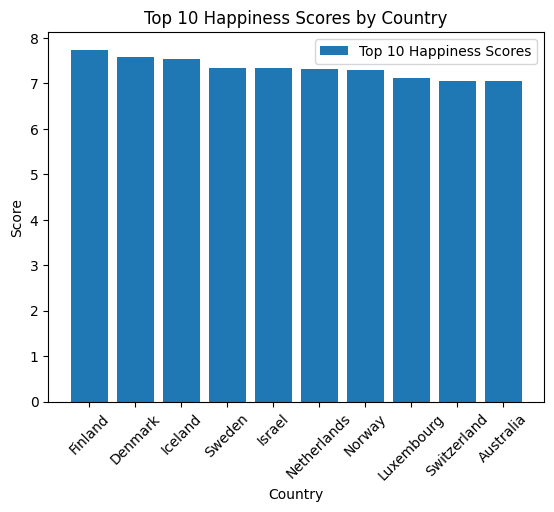

In [12]:
# Sort the 'score' column and select the top 9 scores with their indices
sorted_scores = df[['Country name', 'score']].sort_values(by='score', ascending=False).iloc[0:10]

# Create a bar chart
plt.bar(sorted_scores['Country name'], sorted_scores['score'], label='Top 10 Happiness Scores')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Happiness Scores by Country')

# Add legend
plt.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


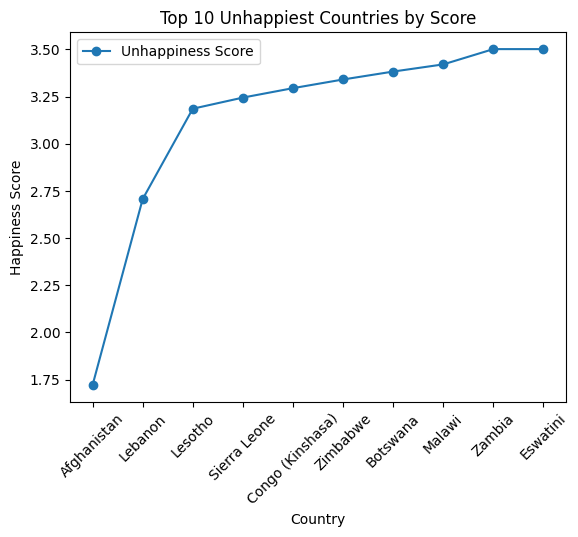

In [13]:
# Sort the DataFrame by 'score' in ascending order and select the top 10 unhappiest countries
unhappiest_countries = df[['Country name', 'score']].sort_values(by='score', ascending=True).iloc[0:10]

# Plot a line chart
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', label='Unhappiness Score')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


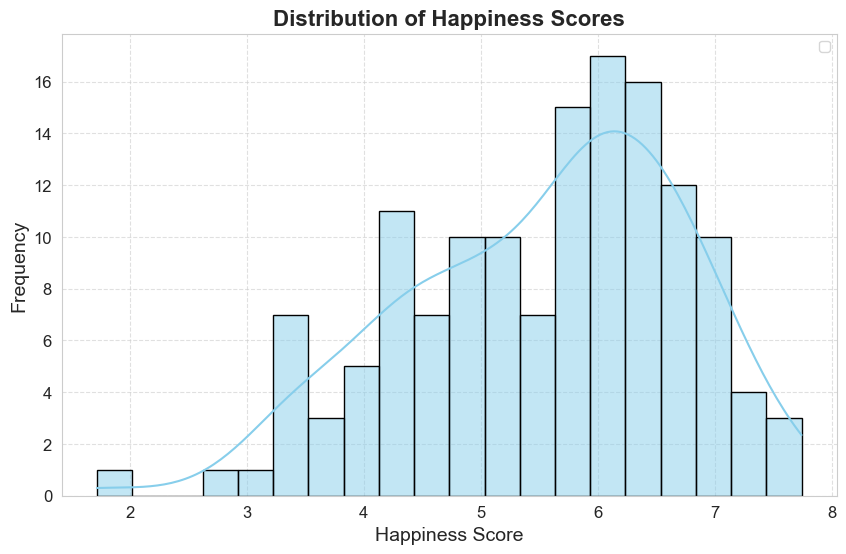

In [14]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
sns.set_palette("muted")

# Create the histogram
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(
    data=df,
    x='score',
    bins=20,               # Number of bins
    kde=True,              # Add a Kernel Density Estimate (KDE) line
    color='skyblue',       # Bar color
    edgecolor='black'      # Bar edges
)

# Add labels and title
plt.title('Distribution of Happiness Scores', fontsize=16, weight='bold')
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

#Legend 
plt.legend()

# Display the plot
plt.show()


Interpretation of Happiness Score distribution:
The happiness score distribution is right skewed (positively skewed). The peak of the distribution (mode) appears to be around 6 indicating most countries are moderately happy. There are few countries with score less than 3 and greater than 7, which suggests that extremely happy and unhappy countries are rare.

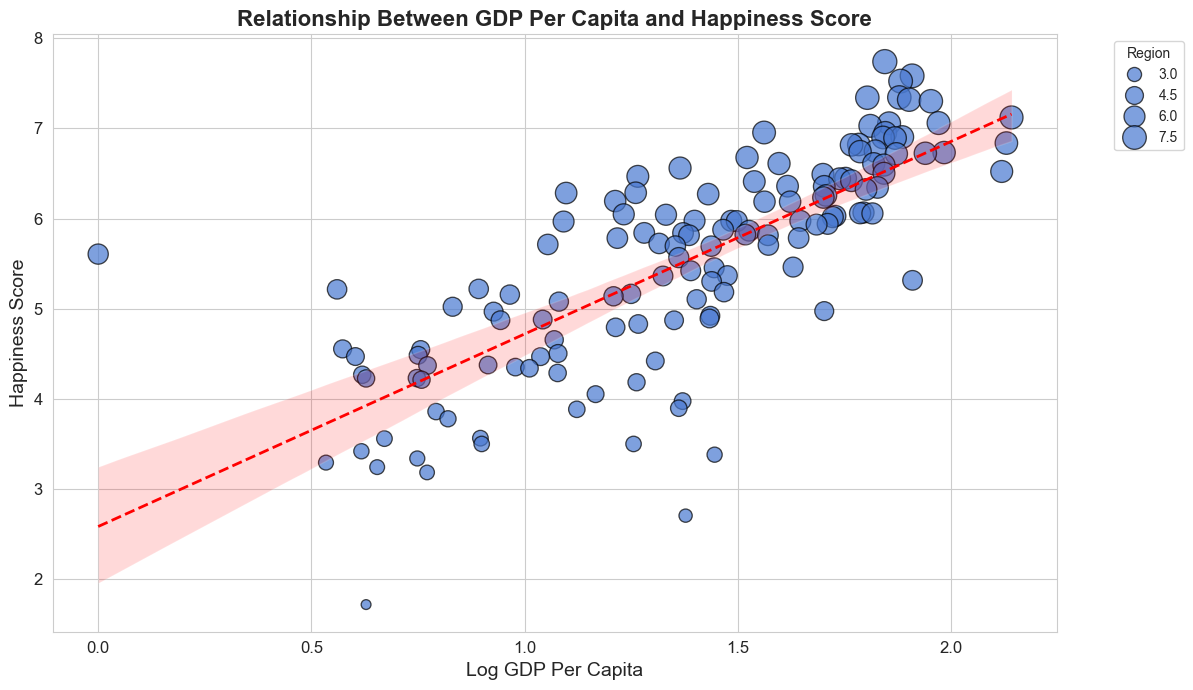

In [15]:
# Set Seaborn style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
sns.scatterplot(
    data=df,
    x='Log GDP per capita',  # X-axis
    y='score',               # Y-axis
    palette='viridis',       # Set a vibrant color palette
    size='score',            # Scale marker size by 'score'
    sizes=(50, 300),         # Marker size range
    edgecolor='black',       # Add black edges to the points for contrast
    alpha=0.7                # Set point transparency for better visibility
)

# Add a regression line
sns.regplot(
    data=df,
    x='Log GDP per capita',
    y='score',
    scatter=False,            # Disable scatter points in the regplot
    color='red',              # Regression line color
    line_kws={'linewidth': 2, 'linestyle': '--'}  # Line style and thickness
)

# Add plot title and axis labels
plt.title('Relationship Between GDP Per Capita and Happiness Score', fontsize=16, weight='bold')
plt.xlabel('Log GDP Per Capita', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
#Problem 2- Some Advance Data Exploration Task:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_south_asian_data = df.loc[df['Country name'].isin(south_asian_countries), :]
filtered_south_asian_data


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Medium
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [17]:
#Saving filtered south asian dataset as csv file 
filtered_south_asian_data.to_csv("South Asian Happiness Report.csv")

In [18]:
#Task 2
#Creating a new feature Composite Score
filtered_south_asian_data['Composite Score'] = 0.4 * filtered_south_asian_data['Log GDP per capita'] + 0.3 * filtered_south_asian_data['Social support'] + 0.3 * filtered_south_asian_data['Healthy life expectancy']
filtered_south_asian_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Medium,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Medium,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [19]:
#Rank south asian countries based on Composite Score
sorted_composite = filtered_south_asian_data.sort_values(by = ['Composite Score', 'score'], ascending= False)[['Country name', 'Composite Score', 'score']]
sorted_composite

,Country name,Composite Score,score
127,Sri Lanka,1.0739,3.898
92,Nepal,0.8159,5.158
125,India,0.7874,4.054
107,Pakistan,0.7039,4.657
128,Bangladesh,0.6774,3.886
142,Afghanistan,0.3238,1.721


Observations from the Table:
Rankings by Composite Score:

Top Rank: Sri Lanka (Composite Score = 1.0739)
Bottom Rank: Afghanistan (Composite Score = 0.3238)
Rankings by Happiness Score:

Top Rank: Nepal (Happiness Score = 5.158)
Bottom Rank: Afghanistan (Happiness Score = 1.721)

The composite scores do not align with the original scores.


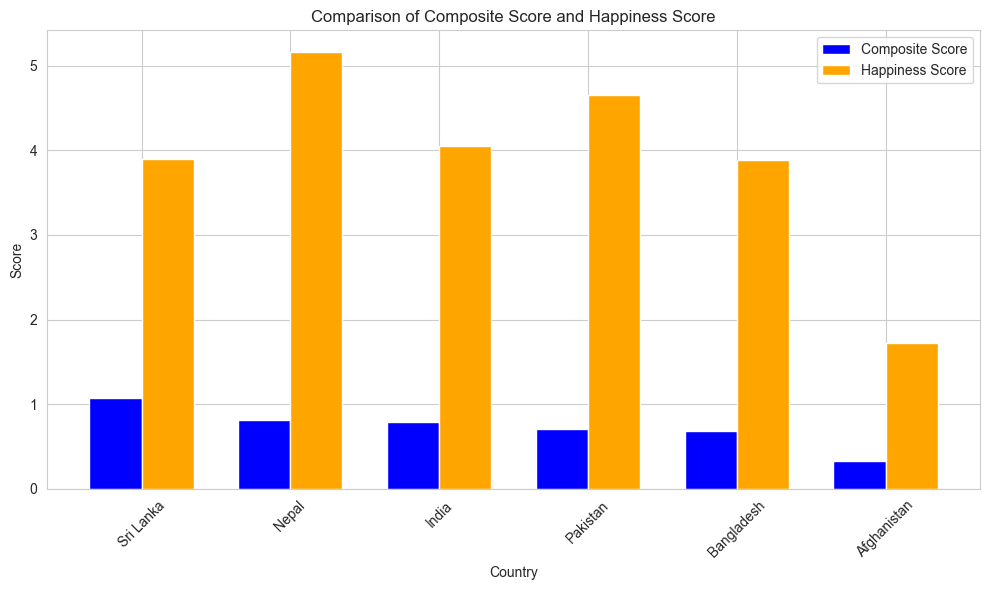

In [20]:


# Visualization
x = np.arange(len(sorted_composite))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
ax.bar(x - width/2, sorted_composite["Composite Score"], width, label="Composite Score", color='blue')
ax.bar(x + width/2, sorted_composite["score"], width, label="Happiness Score", color='orange')

# Labels and formatting
ax.set_xlabel("Country")
ax.set_ylabel("Score")
ax.set_title("Comparison of Composite Score and Happiness Score")
ax.set_xticks(x)
ax.set_xticklabels(sorted_composite["Country name"], rotation=45)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top five south asian countries based on composite scores ')

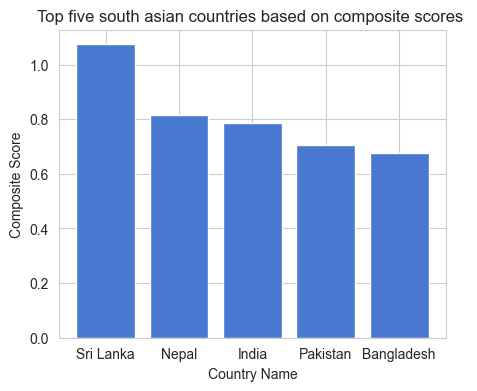

In [21]:
sorted5  = sorted_composite.iloc[0:5,:]
plt.figure(figsize= (5,4))
plt.bar(sorted5['Country name'], sorted5['Composite Score'])
plt.xlabel("Country Name")
plt.ylabel("Composite Score")
plt.title("Top five south asian countries based on composite scores ")

In [22]:
#Task 3 Outlier detection
#Assiging lower and upper bound for detection in score and gdp per capita
score_q1 = filtered_south_asian_data['score'].quantile(0.25)
score_q3 = filtered_south_asian_data['score'].quantile(0.75)
score_iqr = score_q3 - score_q1
lower_bound_score = score_q1 - 1.5 * score_iqr
upper_bound_score = score_q3 + 1.5 * score_iqr
#GDP per capita
gdp_q1 = filtered_south_asian_data['Log GDP per capita'].quantile(0.25)
gdp_q3 = filtered_south_asian_data['Log GDP per capita'].quantile(0.75)
gdp_iqr = gdp_q3 - gdp_q1
lower_bound_gdp = gdp_q1 - 1.5 * gdp_iqr
upper_bound_gdp = gdp_q3 + 1.5 * gdp_iqr

In [23]:
# Identify outliers for Score and GDP per Capita
filtered_south_asian_data['Outlier'] = (
    (filtered_south_asian_data['score'] < lower_bound_score) |
    (filtered_south_asian_data['score'] > upper_bound_score) |
    (filtered_south_asian_data['Log GDP per capita'] < lower_bound_gdp) |
    (filtered_south_asian_data['Log GDP per capita'] > upper_bound_gdp)
)

# Split the dataset into outliers and non-outliers
outliers = filtered_south_asian_data[filtered_south_asian_data['Outlier']]
non_outliers = filtered_south_asian_data[~filtered_south_asian_data['Outlier']]

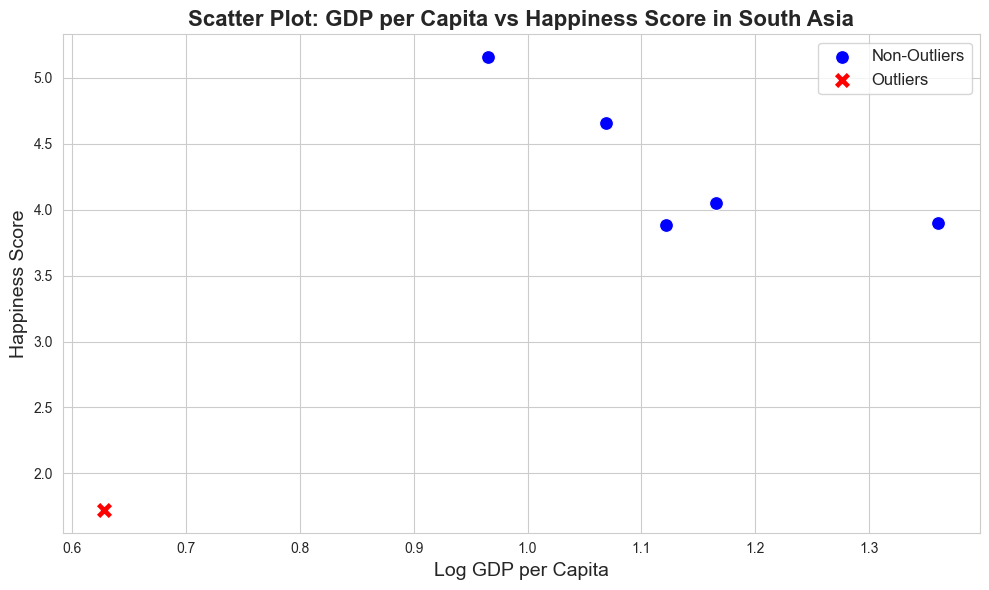

In [24]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=non_outliers,
    x='Log GDP per capita',
    y='score',
    color='blue',
    label='Non-Outliers',
    s=100
)
sns.scatterplot(
    data=outliers,
    x='Log GDP per capita',
    y='score',
    color='red',
    label='Outliers',
    s=150,
    marker='X'
)

# Add labels, title, and legend
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.title('Scatter Plot: GDP per Capita vs Happiness Score in South Asia', fontsize=16, weight='bold')
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#Interpretation of scatterplot:
There is only one outlier in the scatterplot and possibly the lower bound outlier. While outlier generally impact the regional averages, this one also may have some impact by possibly lowering or decreasing the regional mean.


In [25]:
#Task - 4 - Exploring Trends Across Metrics:
social_support_corr = np.corrcoef(filtered_south_asian_data['Social support'], filtered_south_asian_data['score'])[0,1]
health_life_corr = np.corrcoef(filtered_south_asian_data['score'], filtered_south_asian_data['Healthy life expectancy'])[0,1]
print(f"Social_Support_Score_Correlation: {social_support_corr}\nLife_Expec_Score_Correlation: {health_life_corr}")

Social_Support_Score_Correlation: 0.6974343971971296
Life_Expec_Score_Correlation: 0.46154420075686


Social Support and Happiness Score (Correlation = 0.697):
Strength of relationship: Positive moderate correlation
Context: Although social support contributes significantly in the happiness of the people, in the south asian region, it seems that social support does not contribute in the dominant manner on the happiness of the people.


Healthy life expectancy and Happiness Score (Correlation = 0.461)
Strength of relationship: Positive moderate correlation
Context: While the metric healthy life expectancy contributes to the happiness metric, in the south asian region, its impact seems to be less significant.

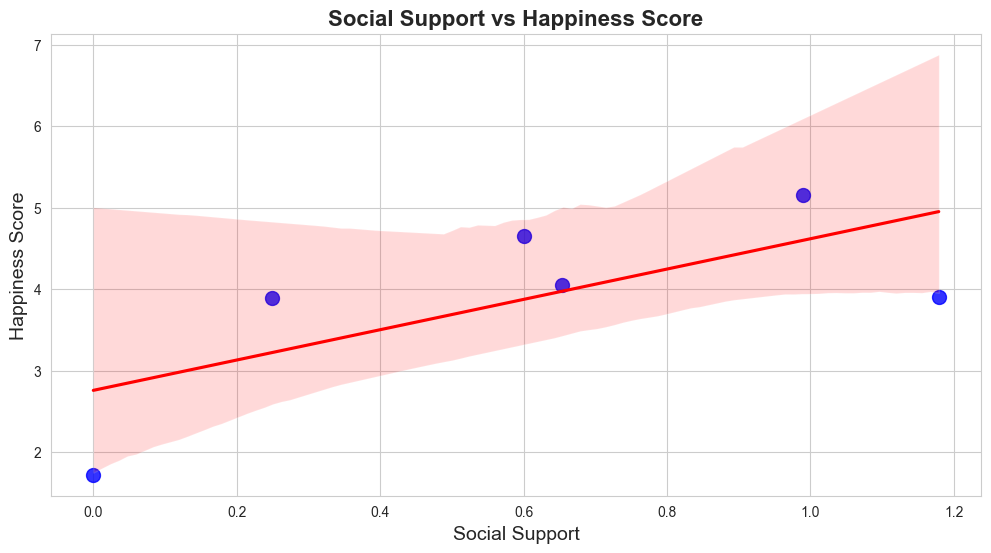

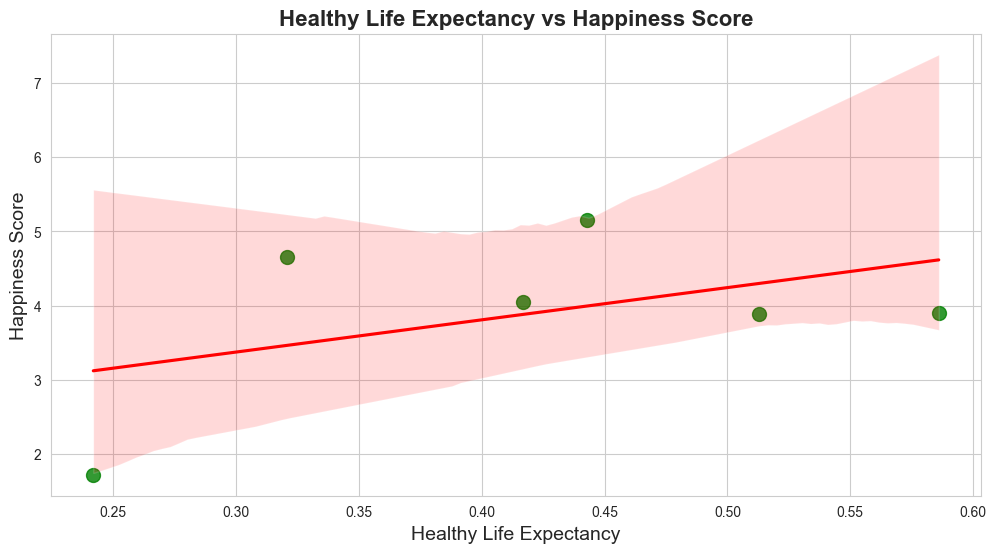

In [26]:
#Plotting scatterplots
plt.figure(figsize=(12, 6))
sns.regplot(
    data=filtered_south_asian_data,
    x='Social support',
    y='score',
    scatter_kws={'color': 'blue', 's': 100},
    line_kws={'color': 'red'}
)
plt.title('Social Support vs Happiness Score', fontsize=16, weight='bold')
plt.xlabel('Social Support', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.show()

# Scatter plot for Healthy Life Expectancy vs Score
plt.figure(figsize=(12, 6))
sns.regplot(
    data=filtered_south_asian_data,
    x='Healthy life expectancy',
    y='score',
    scatter_kws={'color': 'green', 's': 100},
    line_kws={'color': 'red'}
)
plt.title('Healthy Life Expectancy vs Happiness Score', fontsize=16, weight='bold')
plt.xlabel('Healthy Life Expectancy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.show()

In [27]:
#Task - 5 - Gap Analysis:
#1
filtered_south_asian_data['GDP-Score Gap'] = filtered_south_asian_data['score'] - filtered_south_asian_data['Log GDP per capita']
filtered_south_asian_data[['GDP-Score Gap']]

,GDP-Score Gap
92,4.193
107,3.588
125,2.888
127,2.537
128,2.764
142,1.093


In [28]:
# Rank by GDP-Score Gap in ascending order
ranked_ascending = filtered_south_asian_data.sort_values(by='GDP-Score Gap', ascending=True)

# Rank by GDP-Score Gap in descending order
ranked_descending = filtered_south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)

# Display results
print("Ranked by GDP-Score Gap (Ascending):")
print(ranked_ascending[['Country name', 'GDP-Score Gap']])

print("\nRanked by GDP-Score Gap (Descending):")
print(ranked_descending[['Country name', 'GDP-Score Gap']])


Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
142  Afghanistan          1.093
127    Sri Lanka          2.537
128   Bangladesh          2.764
125        India          2.888
107     Pakistan          3.588
92         Nepal          4.193

Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
92         Nepal          4.193
107     Pakistan          3.588
125        India          2.888
128   Bangladesh          2.764
127    Sri Lanka          2.537
142  Afghanistan          1.093


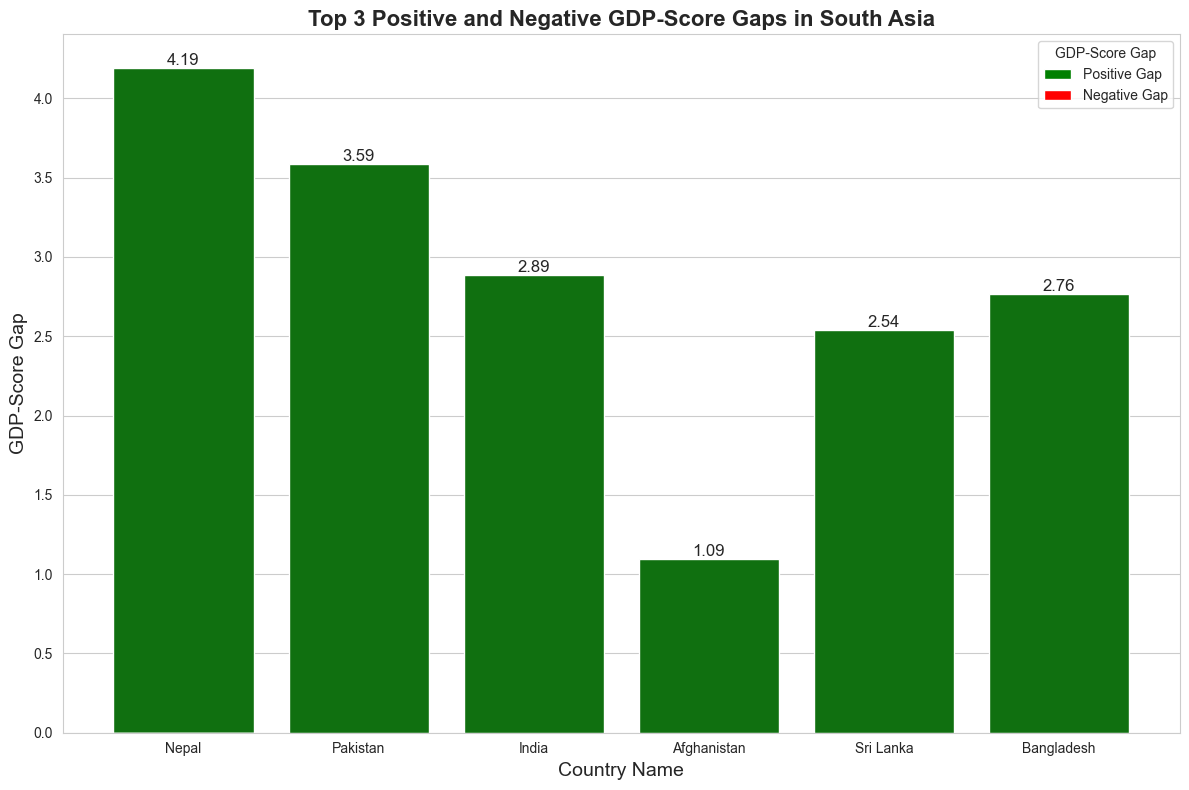

In [29]:
top_3_positive = ranked_descending.head(3)
top_3_negative = ranked_ascending.head(3)

# Combine the datasets for visualization
top_countries = pd.concat([top_3_positive, top_3_negative])

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_countries,
    x='Country name',
    y='GDP-Score Gap',
    palette=['green' if x > 0 else 'red' for x in top_countries['GDP-Score Gap']]
)

# Add labels and title

plt.xlabel('Country Name', fontsize=14)
plt.ylabel('GDP-Score Gap', fontsize=14)
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia', fontsize=16, weight='bold')
# Manually add a legend
legend_labels = ['Positive Gap', 'Negative Gap']
legend_colors = ['green', 'red']

for color, label in zip(legend_colors, legend_labels):
    plt.bar(0, 0, color=color, label=label)  # Add invisible bars for the legend

plt.legend(title="GDP-Score Gap")

# Annotate the bars
for index, value in enumerate(top_countries['GDP-Score Gap']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

From the barplot, we can interpret that Nepal has largest gap whereas Afghanistan has lowest gap. Another interesting thing is that there is no negative gap which means every country in south asia has greater happiness score than that of log value of their GDP. The large gaps in countries like Nepal and Pakistan suggests that people there are driving happiness from aspects other than economic prosperity. 

In [30]:
#3.3 Problem - 3 - Comparative Analysis:

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_df = df.loc[df['Country name'].isin(middle_east_countries), :]
middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Medium
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [31]:
#1 Descriptive Statistics 
#Mean and Standard Deviation of the score of the south asian countries
mean_sa = filtered_south_asian_data['score'].mean()
std_sa = filtered_south_asian_data['score'].std()
mean_sa

np.float64(3.895666666666667)

In [32]:
#Mean and standard deviation of the score of the middle east countries 
mean_me = middle_east_df['score'].mean()
std_me = middle_east_df['score'].std()
mean_me

np.float64(5.351333333333333)

Based on the above results, we can infer that countries in the middle east asia are generally happier.

In [33]:
#Top and Bottom Performers in South Asia Region:
bottom_3_sa = filtered_south_asian_data.sort_values(by = 'score')[['score' ,'Country name']][0:3]
print(f"Bottom three countries in south asia region based on score are:\n{bottom_3_sa}")
top_3_sa = filtered_south_asian_data.sort_values(by = 'score', ascending = False)[['score' ,'Country name']][0:3]
print(f"Top three countries in south asia region based on score are:\n{top_3_sa}")

Bottom three countries in south asia region based on score are:
     score Country name
142  1.721  Afghanistan
128  3.886   Bangladesh
127  3.898    Sri Lanka
Top three countries in south asia region based on score are:
     score Country name
92   5.158        Nepal
107  4.657     Pakistan
125  4.054        India


In [34]:
bottom_3_ma = middle_east_df.sort_values(by = 'score')[['score' ,'Country name']][0:3]
print(f"Bottom three countries in middle east asia region based on score are:\n{bottom_3_ma}")
top_3_ma = middle_east_df.sort_values(by = 'score', ascending = False)[['score' ,'Country name']][0:3]
print(f"Top three countries in south asia region based on score are:\n{top_3_ma}")

Bottom three countries in middle east asia region based on score are:
     score Country name
141  2.707      Lebanon
132  3.561        Yemen
124  4.186       Jordan
Top three countries in south asia region based on score are:
    score          Country name
4   7.341                Israel
12  6.951                Kuwait
21  6.733  United Arab Emirates


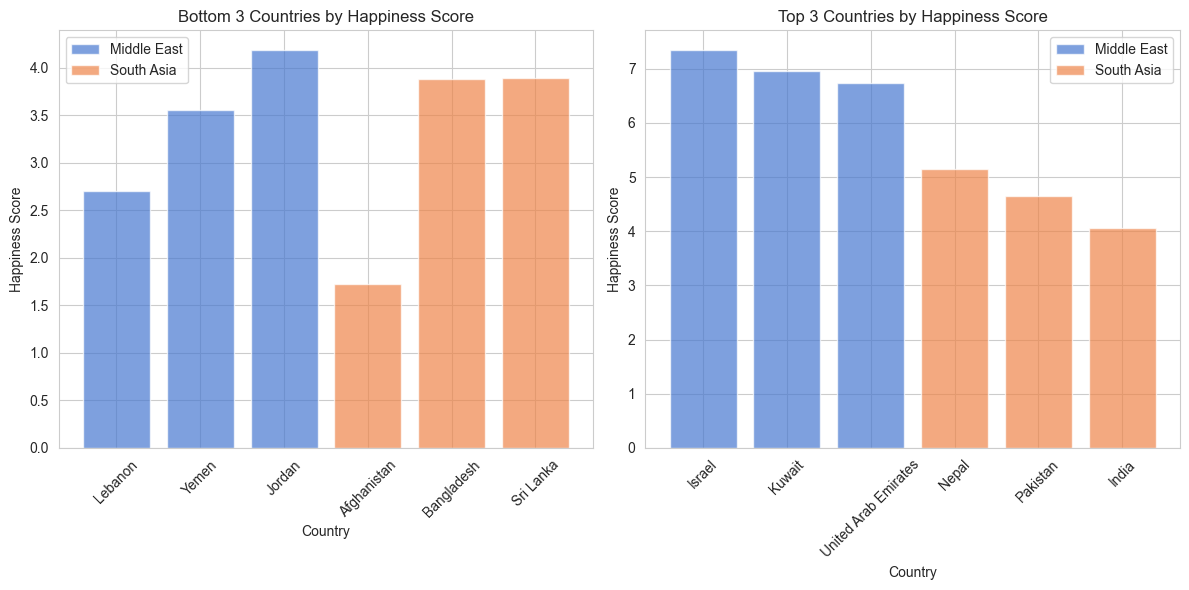

In [35]:
bottom_3_combined = pd.concat([bottom_3_ma.assign(Region="Middle East"), bottom_3_sa.assign(Region="South Asia")])
top_3_combined = pd.concat([top_3_ma.assign(Region="Middle East"), top_3_sa.assign(Region="South Asia")])

# Plot Bottom 3 Countries Comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for region, group in bottom_3_combined.groupby("Region"):
    plt.bar(group["Country name"], group["score"], label=region, alpha=0.7)
plt.title("Bottom 3 Countries by Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()

# Plot Top 3 Countries Comparison
plt.subplot(1, 2, 2)
for region, group in top_3_combined.groupby("Region"):
    plt.bar(group["Country name"], group["score"], label=region, alpha=0.7)
plt.title("Top 3 Countries by Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

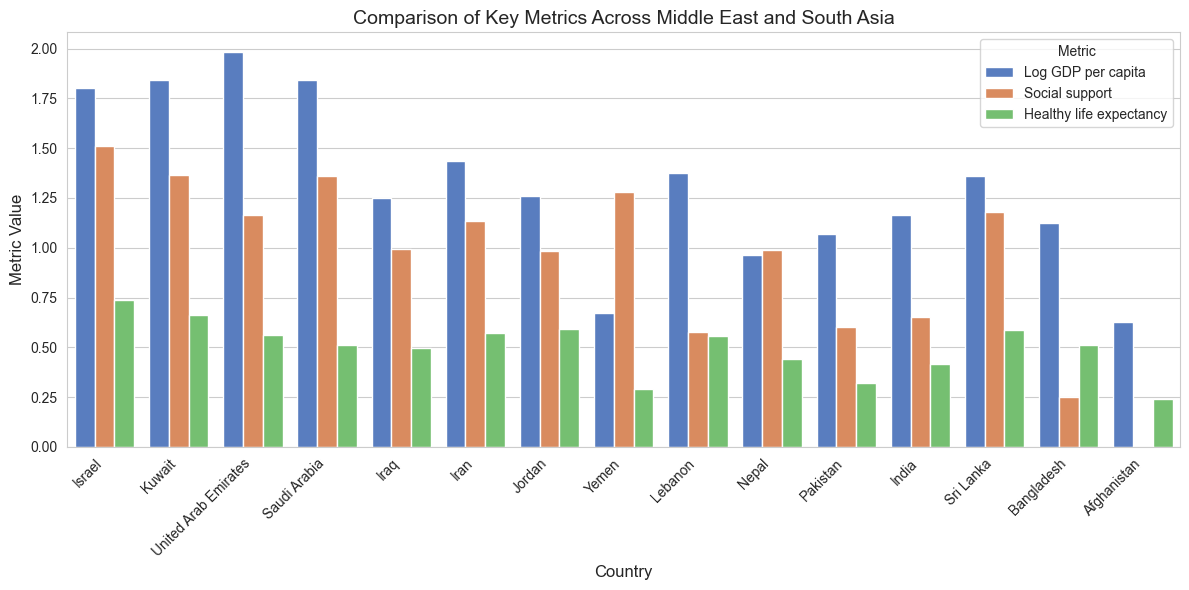

In [36]:
# Combine regions
middle_east_df['Region'] = 'Middle East'
filtered_south_asian_data['Region'] = 'South Asia'

combined_df = pd.concat([middle_east_df, filtered_south_asian_data])

# Select relevant metrics
metrics_df = combined_df[['Country name', 'Region', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']]

# Melt the dataframe for plotting
metrics_melted = metrics_df.melt(id_vars=['Country name', 'Region'], 
                                 value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'], 
                                 var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Country name', y='Value', hue='Metric')
plt.title('Comparison of Key Metrics Across Middle East and South Asia', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

Log GDP per Capita shows the largest gap, followed by Social Support, and then Healthy Life Expectancy. These differences underline the socioeconomic and healthcare infrastructure variations between the two regions.

In [37]:
#Happiness Disparity:
#Range and std for score of South asian countries
range_sa = filtered_south_asian_data['score'].max() - filtered_south_asian_data['score'].min()
cv_sa = filtered_south_asian_data['score'].mean() / filtered_south_asian_data['score'].std()
print(f"The range of happiness score in south asian region is: {range_sa}")
print(f"The coefficient of variation of score in south asian region is: {cv_sa}")

The range of happiness score in south asian region is: 3.4370000000000003
The coefficient of variation of score in south asian region is: 3.309633178843079


In [38]:
#Range and coefficient of variation for score of Middle East Asian Countries
range_ma = middle_east_df['score'].max() - middle_east_df['score'].min()
cv_ma = middle_east_df['score'].std() / middle_east_df['score'].mean()
print(f"The range of happiness score in middle asian region is: {range_ma}")
print(f"The coefficient of variation of score in middle east asian region is: {cv_ma}")

The range of happiness score in middle asian region is: 4.634
The coefficient of variation of score in middle east asian region is: 0.30808328395054224


The variability of happiness score is slightly higher in middle east asian region than south asian with a coefficient of variation 3.45 whereas the south asian region has coefficient of variation of 3.309


In [39]:
#Correlation Analysis:
# Calculate correlation for each region
correlation_by_region = combined_df.groupby('Region')[['score', 'Freedom to make life choices', 'Generosity']].corr().loc[
    (slice(None), 'score'), :]
correlation_by_region = correlation_by_region.droplevel(1)  # Dropping redundant "Score" level
print(correlation_by_region)


             score  Freedom to make life choices  Generosity
Region                                                      
Middle East    1.0                      0.863220    0.627524
South Asia     1.0                      0.800519    0.874512


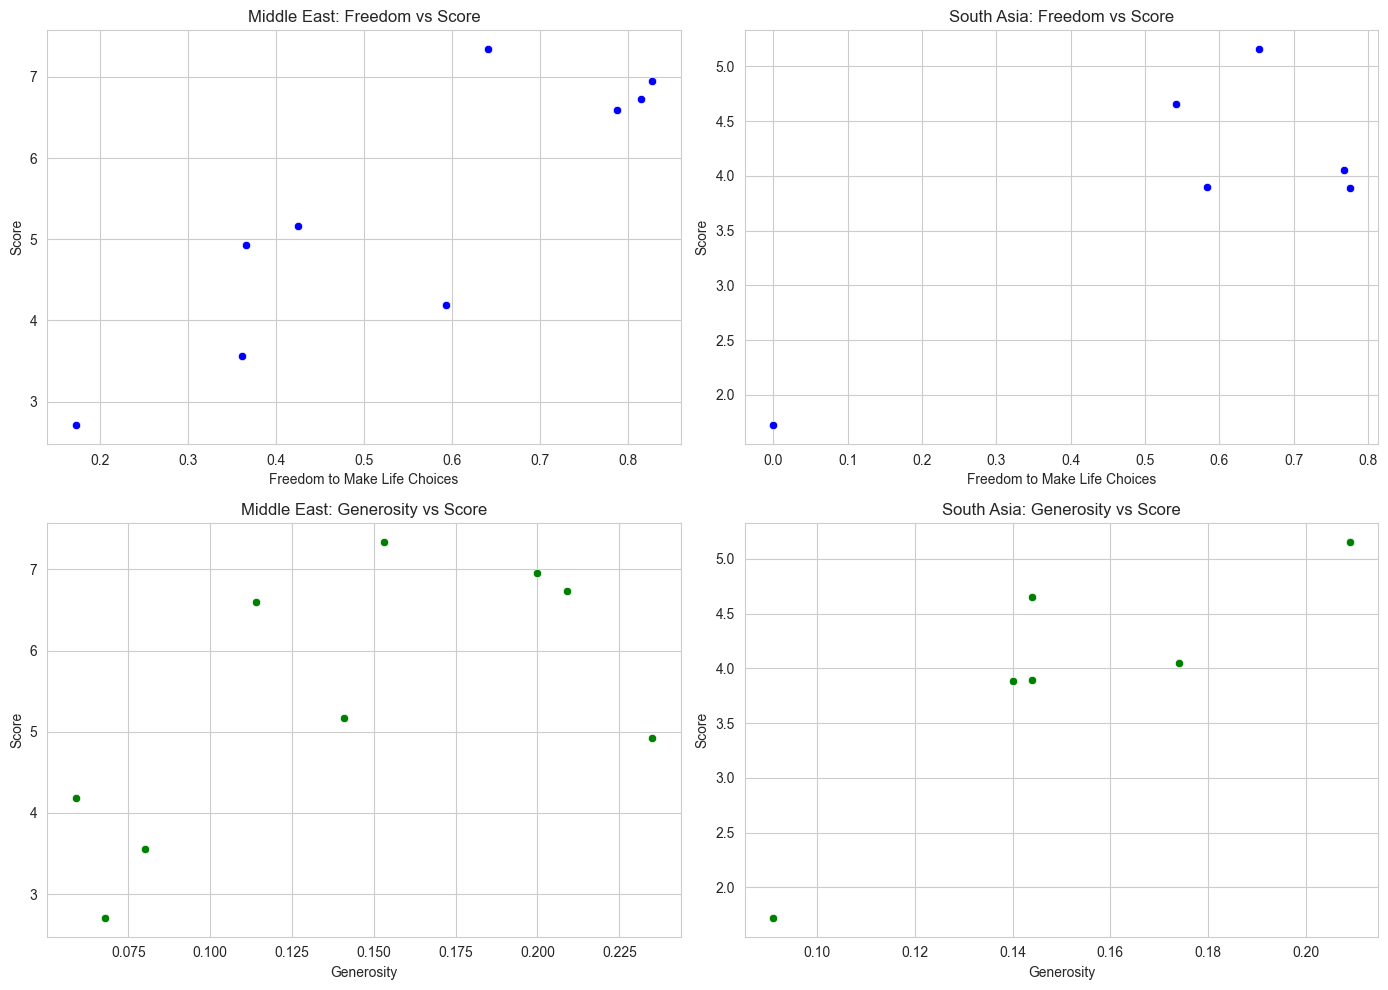

In [40]:
# Filter the data for each region
regions = combined_df['Region'].unique()

plt.figure(figsize=(14, 10))

for i, region in enumerate(regions, start=1):
    regional_data = combined_df[combined_df['Region'] == region]
    
    # Scatter plot: Score vs Freedom to Make Life Choices
    plt.subplot(2, len(regions), i)
    sns.scatterplot(x='Freedom to make life choices', y='score', data=regional_data, color='blue')
    plt.title(f'{region}: Freedom vs Score')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Score')
    
    # Scatter plot: Score vs Generosity
    plt.subplot(2, len(regions), i + len(regions))
    sns.scatterplot(x='Generosity', y='score', data=regional_data, color='green')
    plt.title(f'{region}: Generosity vs Score')
    plt.xlabel('Generosity')
    plt.ylabel('Score')

plt.tight_layout()
plt.show()

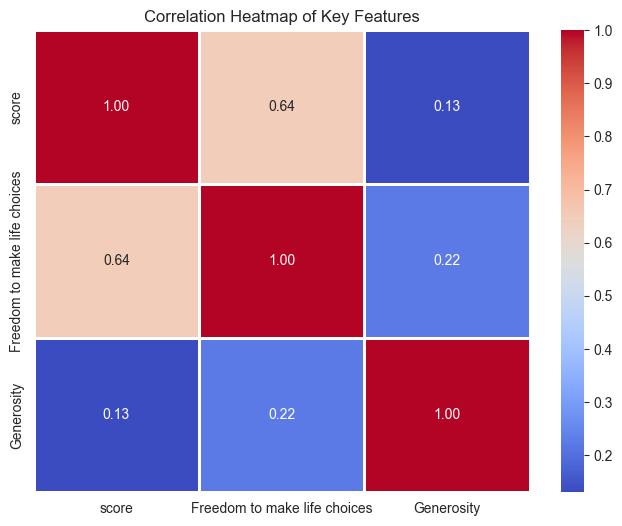

In [41]:
#Plotting the heatmap for score, generosity, and freedom to make life choices
corr_matrix = df[['score', 'Freedom to make life choices', 'Generosity']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Key Features')
plt.show()

Based on the above heatmap and scatterplots, we can interpret that freedom of making choices and happiness are positively and strongly correlated with each other with a correlation coefficient of 0.64, whereas generosity and happiness may not closely correlated with each other with a correlation coefficient of 0.22.

In [42]:
#Outlier detection for South Asian Region
q1_sa_score = filtered_south_asian_data['score'].quantile(0.25)
q3_sa_score = filtered_south_asian_data['score'].quantile(0.75)
IQR_sa_score = q3_sa_score - q1_sa_score
lower_bound_sa_score = q1_sa_score - 1.5 * IQR_sa_score
upper_bound_sa_score = q3_sa_score + 1.5 * IQR_sa_score
#Based on GDP Per  Capita 
q1_sa_gdp = filtered_south_asian_data['Log GDP per capita'].quantile(0.25)
q3_sa_gdp = filtered_south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_sa_gdp = q3_sa_gdp - q1_sa_gdp
lower_bound_sa_gdp = q1_sa_gdp - 1.5 * IQR_sa_gdp
upper_bound_sa_gdp = q3_sa_gdp + 1.5 * IQR_sa_gdp
#Identifying the outlier as per score

filtered_south_asian_data['Outlier_gdp'] = (filtered_south_asian_data['Log GDP per capita'] > upper_bound_sa_gdp) | (filtered_south_asian_data['Log GDP per capita'] < lower_bound_sa_gdp)
filtered_south_asian_data['Outlier_score'] = (filtered_south_asian_data['score'] > upper_bound_sa_score) | (filtered_south_asian_data['score'] < lower_bound_sa_score)
filtered_south_asian_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,Outlier,GDP-Score Gap,Region,Outlier_gdp,Outlier_score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,False,4.193,South Asia,False,False
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,False,3.588,South Asia,False,False
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,False,2.888,South Asia,False,False
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Medium,1.0739,False,2.537,South Asia,False,False
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Medium,0.6774,False,2.764,South Asia,False,False
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,True,1.093,South Asia,True,True


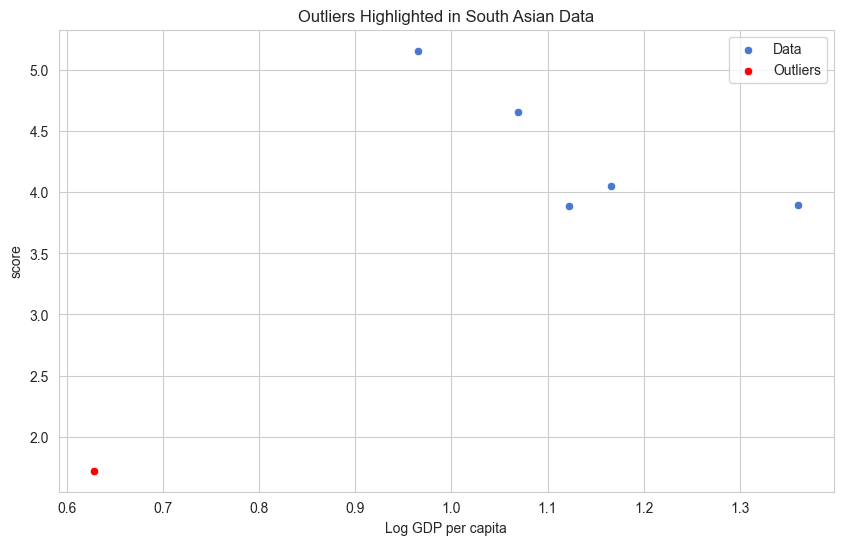

In [43]:
# Highlighting Outliers
outliers = filtered_south_asian_data[(filtered_south_asian_data['Outlier_gdp'] == True) | 
                                     (filtered_south_asian_data['Outlier_score'] == True)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_south_asian_data, x='Log GDP per capita', y='score', label='Data')
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title('Outliers Highlighted in South Asian Data')
plt.legend()
plt.show()


There is only one outlier in the South Asian dataset and it is of the country Afghanistan with outlier from both gdp and score. The outlier implies that happiness score of Afghanistan is too far from the average happiness score implying the people there are extremely unhappy. 

In [44]:
#Outlier detection for Middle East Region
q1_me_score = middle_east_df['score'].quantile(0.25)
q3_me_score = middle_east_df['score'].quantile(0.75)
IQR_me_score = q3_me_score - q1_me_score
lower_bound_me_score = q1_me_score - 1.5 * IQR_me_score
upper_bound_me_score = q3_me_score + 1.5 * IQR_me_score
#For gdp 
q1_me_gdp = middle_east_df['Log GDP per capita'].quantile(0.25)
q3_me_gdp = middle_east_df['Log GDP per capita'].quantile(0.75)
IQR_me_gdp = q3_me_gdp - q1_me_gdp
lower_bound_me_gdp = q1_me_gdp - 1.5 * IQR_me_gdp
upper_bound_me_gdp = q3_me_gdp + 1.5 * IQR_me_gdp
#Outlier identification
middle_east_df['Outlier_GDP'] = (middle_east_df["Log GDP per capita"] < lower_bound_me_gdp) | (middle_east_df["Log GDP per capita"] > upper_bound_me_gdp)
middle_east_df['Outlier_Score'] = (middle_east_df['score'] < lower_bound_me_score) | (middle_east_df['score'] > upper_bound_me_score)
middle_east_df[['Outlier_GDP', 'Outlier_Score']]

,Outlier_GDP,Outlier_Score
4,False,False
12,False,False
21,False,False
27,False,False
91,False,False
99,False,False
124,False,False
132,False,False
141,False,False


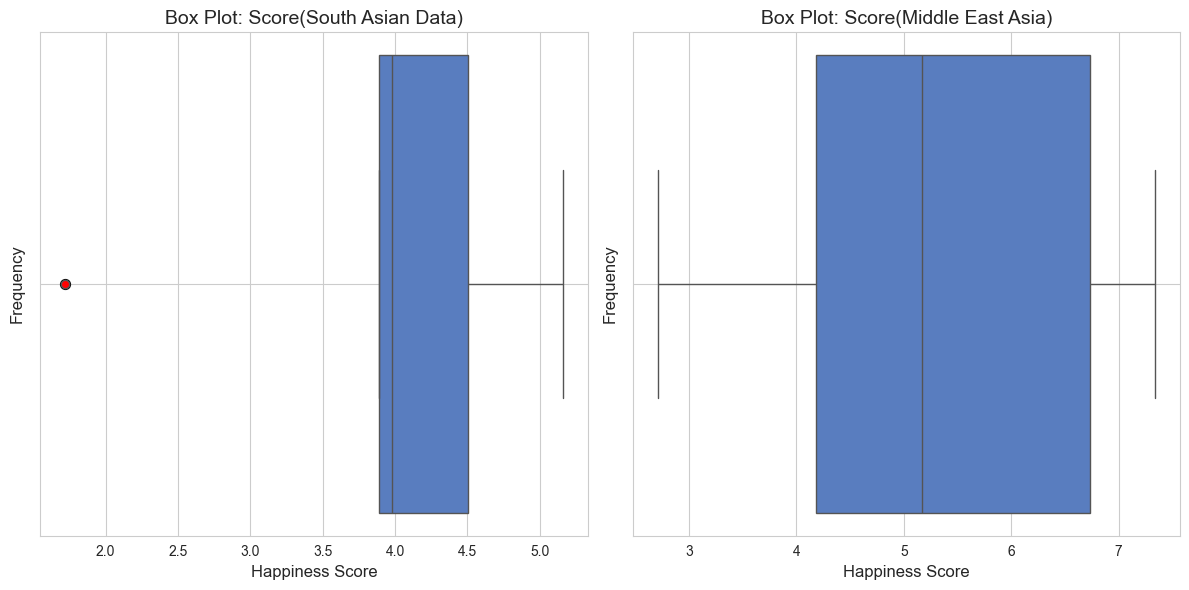

In [45]:
#Visualization
#Creating Subplots 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# First subplot (Box Plot for Score)
sns.boxplot(data=filtered_south_asian_data, x='score', ax=ax[0])
ax[0].set_title('Box Plot: Score(South Asian Data)', fontsize = 14)
ax[0].set_xlabel('Happiness Score', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].grid(True)
outliers_sa = filtered_south_asian_data[
    (filtered_south_asian_data['Outlier_score'])
]
ax[0].scatter(
    outliers_sa['score'],
    [0] * len(outliers_sa),
    color='red', label='Outliers', s=50, edgecolor='black'
)

# Second subplot (Box Plot for GDP)
sns.boxplot(data=middle_east_df, x='score', ax=ax[1])
ax[1].set_title('Box Plot: Score(Middle East Asia)', fontsize = 14)
ax[1].set_xlabel('Happiness Score', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(True)
outliers_me = middle_east_df[(middle_east_df['Outlier_Score'])]
ax[1].scatter(
    outliers_me['score'],
    [0] * len(outliers_me),
    color='orange', label='Outliers', s=50, edgecolor='black'
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Shape: South Asian data has a more symmetrical distribution with median nearly lying in the middle, whereas the middle east asian data has a skewed data distribution.
Median: Median Happiness Score of Middle East Asia is greater than that of South Asia. This indicates that the overall happiness levels tend to be higher in the Middle East Asian region compared to South Asia.
Outlier: South Asian data has one outlier in the lower end indicating some countries with extremely low happiness scores in that region. Middle East Asian data has no outlier.

